# Genetic algorithm

In [ ]:
# Imports
import pickle
import time
import matplotlib.pyplot as plt
import numpy as np
import sys
from qiskit.quantum_info import SparsePauliOp
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import mitigation as mit

## Observables

We Know $Z_1\otimes Z_2$ exhibits a BP with deep anstaz.

In [2]:
# Hamiltonians
with open(f"data/H2_hamiltonian.pkl", "rb") as f:
    hamiltonian_H2 = pickle.load(f)

Z1Z2_obs = SparsePauliOp.from_list([("ZZ", 1)])

### Minimization process with AG

c:\Users\juanl\miniconda3\envs\qml_avoiding_bp\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qml_avoiding_bp\lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


{'minimum_value': -0.9999149799899055, 'optimal_parameters': [4.266222035176924, 1.5455514123315321, 5.463281326187435, 5.529032762589635, 2.7877462585183634, 0.35058475931270255, 2.376015227905173, 2.632282146673095], 'n_evaluations': 548, 'n_generations': 39, 'cost_history': [-0.5198894572829483, -0.6758383498694105, -0.8625109118481757, -0.8664821237720126, -0.8527182898201442, -0.8527182898201442, -0.9360577449867962, -0.9626574618010707, -0.9666481482940569, -0.9666481482940569, -0.9878174136989576, -0.9878174136989576, -0.9908994977792065, -0.9932186685557616, -0.9932186685557616, -0.993385262858804, -0.9936008202201343, -0.9968304598319849, -0.9984526153092008, -0.9986112975762994, -0.9992669026251461, -0.9992669026251461, -0.9991599898121529, -0.9998051143481612, -0.9998600033446593, -0.9999044398559545, -0.9999044398559545, -0.9999044398559545, -0.9999044398559545, -0.9999149799899055, -0.9999149799899055, -0.9999149799899055, -0.9999149799899055, -0.9999149799899055, -0.99992

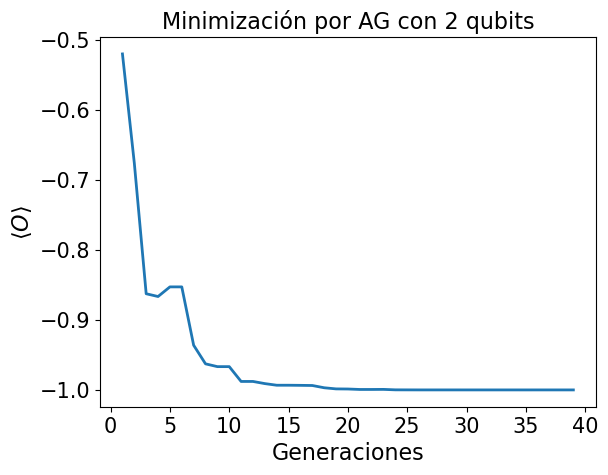

{'minimum_value': -0.9979828477607643, 'optimal_parameters': [1.6874952622515593, 1.5853083912976733, 2.1722335126510037, 5.913843204097953, 0.41960254358153204, 4.256627946101381, 5.801155878492176, 5.548783590441216, 5.477787053360651, 0.008047928105962027, 5.590481722060117, 6.2000872969867356, -0.22063420050781996, 5.080266979912048, 4.91827647084366, 0.45886215908156514, 3.435260836058738, 0.22080526945655368, 5.425495626859835, 2.131962069541027, 2.049291498598408, 1.7260732214246497, 1.8107719343031798, 0.37627902968560245, 0.40566023916241095, 6.299517489006542, 4.328935715075729, 4.158298030931228, 2.9963132415924143, 3.658371999166767, 2.1896036596574096, 2.349639412460381], 'n_evaluations': 1389, 'n_generations': 100, 'cost_history': [-0.6847952411946899, -0.6847952411946899, -0.7004623090047418, -0.7141449451566679, -0.7517718654340094, -0.7567259404746344, -0.7703702746547572, -0.8024304147260073, -0.8507686535580408, -0.8507686535580408, -0.8890476764498096, -0.8955015036

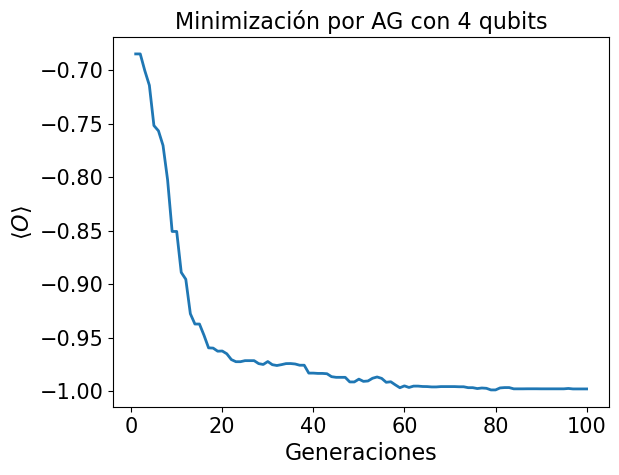

{'minimum_value': -0.9972682147857559, 'optimal_parameters': [4.7220347246887435, 5.0166823634848345, 2.833503732218694, 0.2367167697729355, 5.622385847282696, 3.967789786460848, 0.5619492764718649, 4.060750656392497, 4.2267736103703974, 3.84361388515087, 5.667497489090381, 5.007960117394255, 3.2618969110950915, 3.3502512006818685, 6.094877393716687, 3.802321960523498, 0.8670966797716739, 4.472994466125974, 5.437559189158939, 3.448422466196533, 1.4957920185604696, 3.9278538974619313, 2.985966021885248, 0.9070195404648348, 3.140300848701365, 5.96788081560736, 1.133250364717778, 4.286620136443331, 2.854054619818785, 3.140375451249969, 4.09037759371997, 5.668085019555548, 3.506051030073881, 3.9860108521283855, 2.9978135313782794, 5.944393760398695, 5.482983836549117, 0.8678167168775109, 3.5455523817409236, 3.6012730550082965, 3.5877109868195363, 2.267091513201416, 2.996122091209644, 2.932996328327975, 4.563218747008448, 3.747417240242286, 3.1159731370347687, 1.633656027300698, 2.844095470

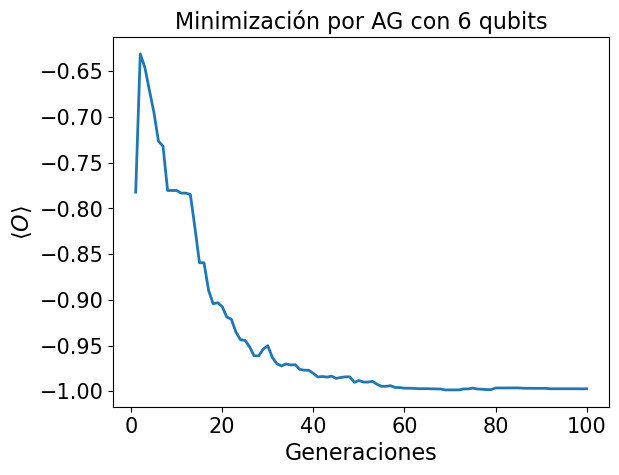

{'minimum_value': -0.9849775164123853, 'optimal_parameters': [2.141403058525621, 4.312149217265163, 0.9918254708311929, 0.9189611776353673, 1.2405747962495057, 3.8430085110439762, 6.399293644463887, 5.299871109425393, 1.4630323057369132, 5.219560821745184, -0.5275451925229214, 3.552188328994094, 3.4987497117041544, 6.128905931438289, 6.484198519156548, 5.509098749006349, 1.0712635602272418, 5.910556309437103, 3.2814534264401525, 5.233042843697238, 4.0357467642434495, 1.2496399732815942, 4.351567880852169, 2.593278257479286, 1.499725385233437, 0.6125870380632028, 3.9181032183849536, 3.0272576323194667, 2.1603356344006164, 5.214967942197836, 0.14105318848648632, 5.844893753854, 2.0453058186432256, 1.317601772693062, 4.761937119471993, 3.117176537482988, 5.923336041484505, 1.5677266096564504, 0.06945657235286791, 1.319483209944691, 2.510650885926781, 3.163598209149626, 3.359951111084591, 0.9038259125603196, 4.076620727345231, 3.0684644463983806, 3.42381228252665, 2.5253082149923793, 5.584

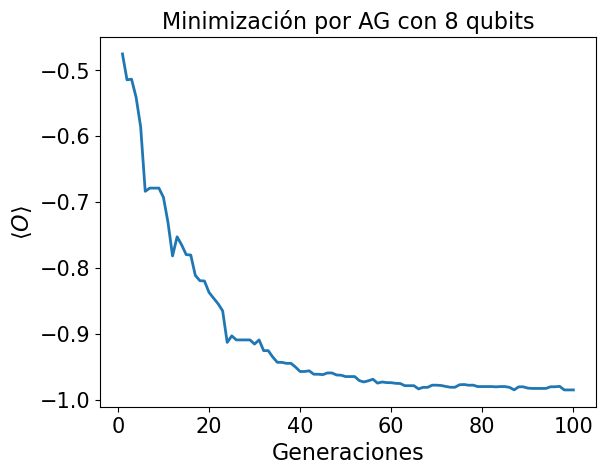

{'minimum_value': -0.9849152388681522, 'optimal_parameters': [3.589937845517423, 1.8574931165960717, 3.95517223953408, 5.536146696841041, 1.6371032627040798, 2.2833892089291763, 2.8742370548817933, 2.5923081718761716, 3.885159232639998, 4.197138051162751, 1.3236480109102529, 1.6583505061571169, 2.754131930507418, 2.2642894111130127, 1.9398580982222144, 5.4323870052514405, 5.0274194748623175, 2.6051293886736597, 1.5114802743191862, 0.5475732520017217, 4.933396414995636, 4.353861576930131, 2.473746575183589, 0.70162022651879, 4.321558857362683, 3.2084884842888712, 1.7288412730928422, 4.830968293757249, 0.7903908722164666, 3.716377911646122, 2.9063484513342788, 4.3242008864748716, 3.9786200211884175, 1.6141522686338816, 5.71396288729198, 3.204555474362771, 3.247999003410602, 2.6206298018624774, 1.6751415866414563, 6.024931618476815, 5.345676181812865, 0.28769177462219436, 5.07606584592667, 5.228500240162479, 5.9193811952388975, 4.785799458803617, 1.8293617010615828, 3.8766252595008535, 6.

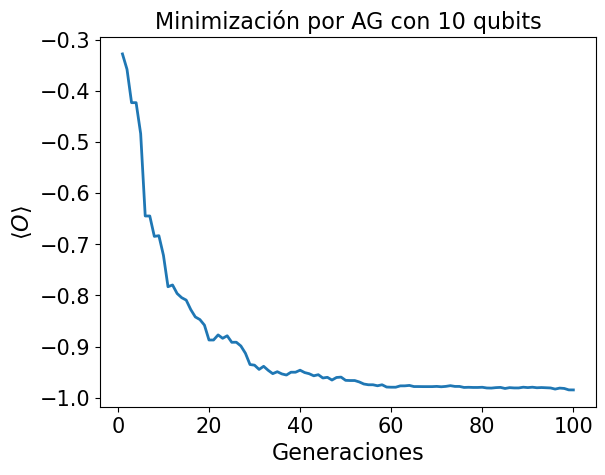

In [48]:
# Convergencia
for n_qubits in range(2, 11, 2):

    expanded_obs = cf.expand_observable(Z1Z2_obs, n_qubits)

    minimization_data = mit.VQE_minimization_AG(anz.build_deep_ansatz(n_qubits, 2)[0], expanded_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=15, max_gen=100, print_info=False, plot_info=False)

    print(minimization_data)

    plt.plot(range(1, minimization_data["n_generations"]+1), minimization_data["cost_history"], label=r"$\langle O\rangle$", linewidth=2)

    plt.xlabel(r"Generaciones", size=16)
    plt.ylabel(r"$\langle O\rangle$", size=16)
    plt.title(rf"Minimización por AG con {n_qubits} qubits", size=16)
    plt.xticks(fontsize="15")
    plt.yticks(fontsize="15")

    plt.show()

### GA performance distributions

Population of 5

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 5

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)


for iter in range(n_experiments):

    t0 = time.time()
    data = mit.VQE_minimization_AG(anz.build_deep_ansatz(2,2)[0], Z1Z2_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_gen=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data["n_generations"]
    evaluations_exp[iter] = data["n_evaluations"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["minimum_value"]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_GA_2qubits_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

Population of 10

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Población a usar en este experimento
pop = 10

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments)
generations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)


for iter in range(n_experiments):

    t0 = time.time()
    data = mit.VQE_minimization_AG(anz.build_deep_ansatz(2,2)[0], Z1Z2_obs, 0.0001, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_gen=1000, print_info=False, plot_info=False)
    t1 = time.time()

    generations_exp[iter] = data["n_generations"]
    evaluations_exp[iter] = data["n_evaluations"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["minimum_value"]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_GA_2qubits_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

## GA vs COBYLA

Only COBYLA

In [ ]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 1000

# Guardare los datos de los experimentos
generations_exp = np.zeros(n_experiments)
evaluations_exp = np.zeros(n_experiments)
time_exp = np.zeros(n_experiments)
minimums_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()

    data = mit.VQE_minimi5zation(anz.build_deep_ansatz(2, 2)[0], Z1Z2_obs, initial_guess="rand", tol=0.0001)

    t1 = time.time()
    evaluations_exp[iter] = data["iters"]
    time_exp[iter] = t1-t0
    minimums_exp[iter] = data["cost_history"][-1]

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp, minimums_exp))
np.savetxt(f"data/genetic/data_COBYLA_2qubits.csv", array_to_save, fmt="%f", delimiter=",")

Plots

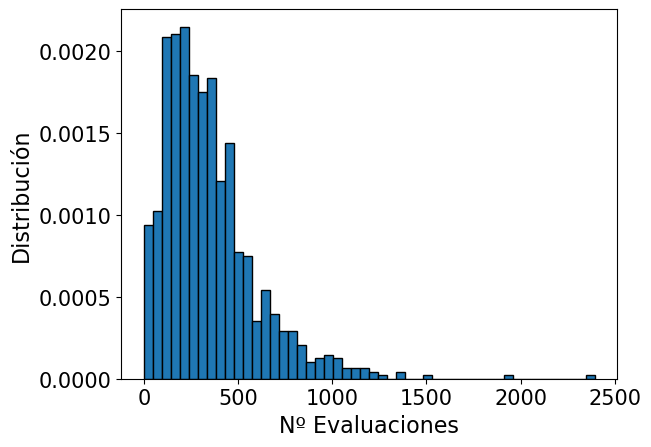

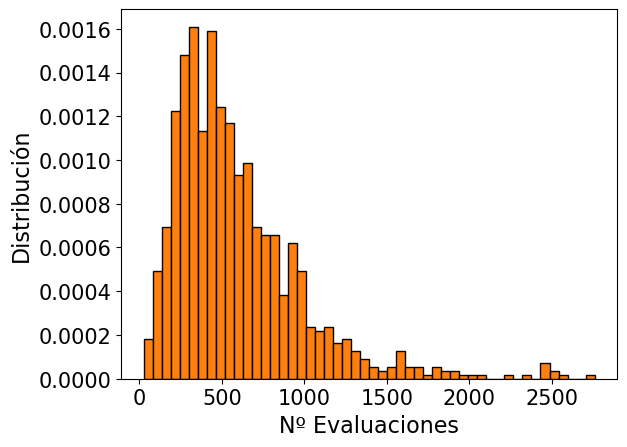

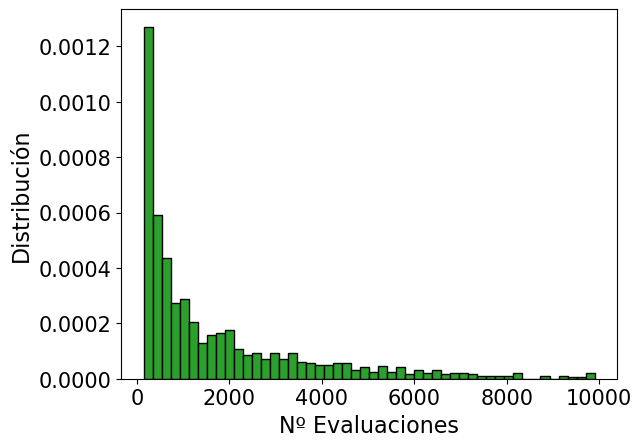

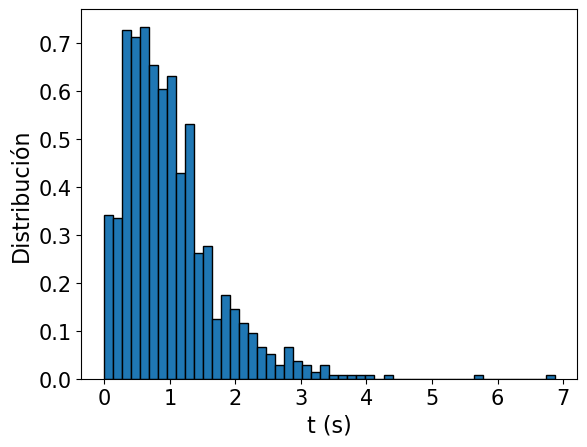

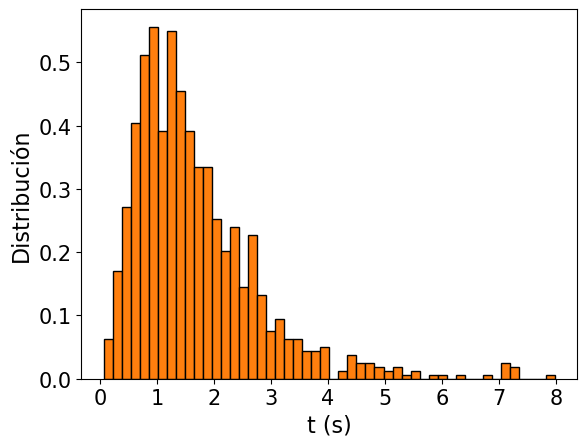

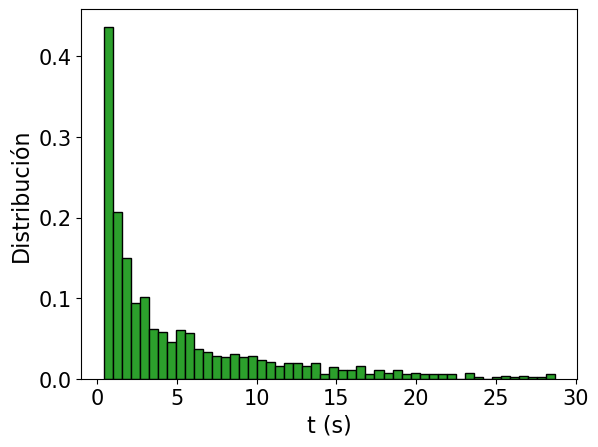

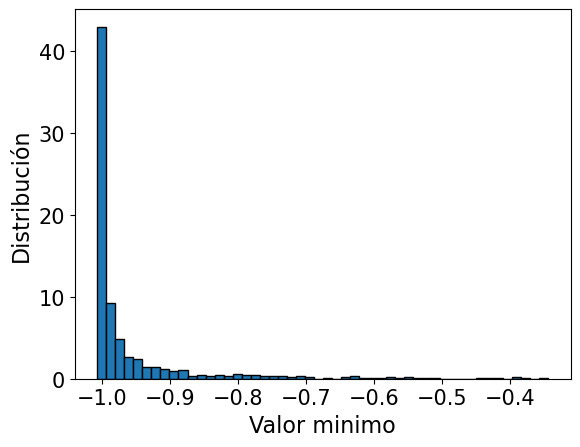

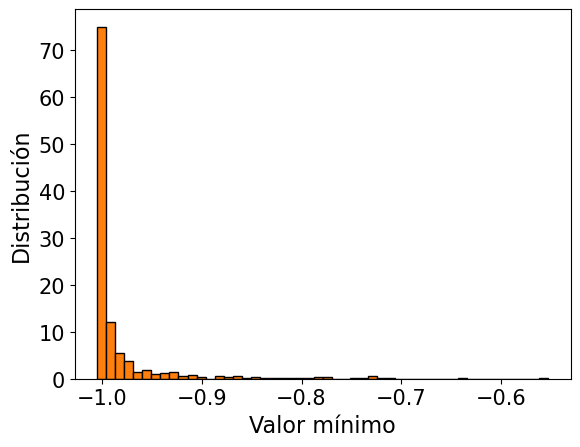

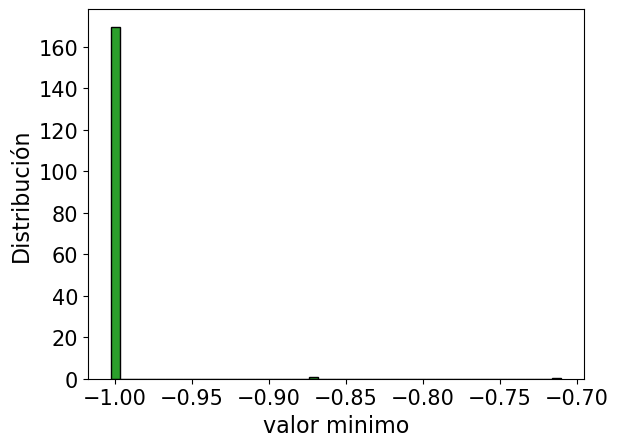

In [46]:
#Func to plot distributions as histograms

def plot_distrib(data : np.ndarray, n_bars : int, label : str, color = "#1f77b4"):
    hist = np.histogram(data, n_bars, density=True)
    max_value = np.max(data)
    min_value = np.min(data)
    x_data = hist[1][:-1]
    y_data = hist[0]
    plt.bar(x_data, y_data, (max_value-min_value)/n_bars, edgecolor="black", align="center", color=color)

    plt.ylabel("Distribución", size=16)
    plt.xlabel(label, size=16)
    plt.xticks(fontsize="15")
    plt.yticks(fontsize="15")
    plt.show()

# Cargo los datos
AG_loaded_data_5 = np.loadtxt("data/genetic/data_GA_3qubits_5.csv", delimiter=",")
AG_loaded_data_10 = np.loadtxt("data/genetic/data_GA_3qubits_10.csv", delimiter=",")
COBYLA_loaded_data = np.loadtxt("data/genetic/data_COBYLA_3qubits.csv", delimiter=",")

plot_distrib(AG_loaded_data_5[:, 1], 50, "Nº Evaluaciones")
plot_distrib(AG_loaded_data_10[:, 1], 50, "Nº Evaluaciones", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 1], 50, "Nº Evaluaciones", color="#2ca02c")

plot_distrib(AG_loaded_data_5[:, 2], 50, "t (s)")
plot_distrib(AG_loaded_data_10[:, 2], 50, "t (s)", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 2], 50, "t (s)", color="#2ca02c")

plot_distrib(AG_loaded_data_5[:, 3], 50, "Valor minimo")
plot_distrib(AG_loaded_data_10[:, 3], 50, "Valor mínimo", color="#ff7f0e")
plot_distrib(COBYLA_loaded_data[:, 3], 50, "valor minimo", color="#2ca02c")

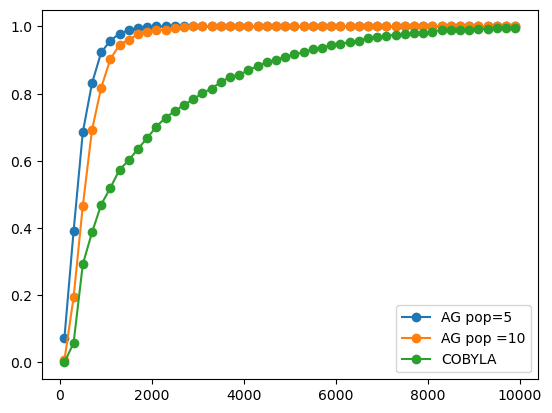

In [42]:
def plot_probs(datas : list, x_values : list, labels : list):

    n_experiments = len(datas)

    amounts = [[] for i in range(n_experiments)]

    for exp in range(n_experiments):

        for x_limit in x_values:

            amounts[exp].append(np.count_nonzero(datas[exp] <= x_limit)/len(datas[exp]))

        plt.plot(x_values, amounts[exp], marker="o", label = labels[exp])
        
    plt.legend()
    plt.show()


plot_probs([AG_loaded_data_5[:, 1], AG_loaded_data_10[:, 1], COBYLA_loaded_data[:, 1]], range(100, 10100, 200), ["AG pop=5", "AG pop =10", "COBYLA"])


### Areas under the curves

In [45]:
def calculate_areas(datas : list, x_values : list, labels : list):
    
    n_experiments = len(datas)

    areas = [0 for i in range(n_experiments)]

    for exp in range(n_experiments):

        for x_limit in x_values:

            if x_limit != x_values[0]:
                areas[exp] += np.count_nonzero(datas[exp] <= x_limit)/len(datas[exp])*(x_limit - x_values[x_values.index(x_limit)-1])/(x_values[-1] - x_values[0])
    
    return {labels[i] : areas[i] for i in range(n_experiments)}

areas_dict = calculate_areas([AG_loaded_data_5[:, 1], AG_loaded_data_10[:, 1], COBYLA_loaded_data[:, 1]], range(100, 10100, 200), ["AG pop=5", "AG pop =10", "COBYLA"])
print(areas_dict)

print(f"Ventaja AG pop=5 sobre cobyla: {(areas_dict['AG pop=5']/areas_dict['COBYLA'] - 1)*100}%")


{'AG pop=5': 0.9744897959183682, 'AG pop =10': 0.9574693877551028, 'COBYLA': 0.8327142857142857}
Ventaja AG pop=5 sobre cobyla: 17.02570889395396%


### H2 2-local

GA + COBYLA

In [31]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Población a usar en este experimento
pop = 25

# Numero maximo de generaciones
max_gen = 50

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    # Booleano para comprobar convergencia del AG
    converg = False

    t0 = time.time()
    while not converg:

        AG_data_H2_2local = mit.VQE_minimization_AG(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, -1.75, crossover_prob=0.8, mutation_prob=0.6, population_size=pop, max_iters=max_gen, print_info=False, plot_info=False)
        evaluations_exp[iter] += AG_data_H2_2local["n_evaluations"]
        
        # Si el AG converge
        if AG_data_H2_2local["n_generations"] < max_gen:
            converg = True

    evaluations_exp[iter] +=  mit.VQE_minimization(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, initial_guess=AG_data_H2_2local["optimal_parameters"])["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_GA+COBYLA_H2_twolocal_{pop}.csv", array_to_save, fmt="%f", delimiter=",")

c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\juanl\miniconda3\envs\qiskit-tfm\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Experiment 0 terminated with 2621 evaluations.

Experiment 1 terminated with 4259 evaluations.

Experiment 2 terminated with 6395 evaluations.

Experiment 3 terminated with 654 evaluations.

Experiment 4 terminated with 6259 evaluations.

Experiment 5 terminated with 6177 evaluations.

Experiment 6 terminated with 1941 evaluations.

Experiment 7 terminated with 6266 evaluations.

Experiment 8 terminated with 10118 evaluations.

Experiment 9 terminated with 2982 evaluations.

Experiment 10 terminated with 4863 evaluations.

Experiment 11 terminated with 2474 evaluations.

Experiment 12 terminated with 4073 evaluations.

Experiment 13 terminated with 2943 evaluations.

Experiment 14 terminated with 4353 evaluations.

Experiment 15 terminated with 3500 evaluations.

Experiment 16 terminated with 1639 evaluations.

Experiment 17 terminated with 2164 evaluations.

Experiment 18 terminated with 4607 evaluations.

Experiment 19 terminated with 9436 evaluations.

Experiment 20 terminated with 

Only COBYLA

In [32]:
# Numero de experimentos (optimizaciones) a realizar
n_experiments = 500

# Guardare los datos de los experimentos
evaluations_exp = np.zeros(n_experiments, dtype=int)
generations_exp = np.zeros(n_experiments, dtype=int)
time_exp = np.zeros(n_experiments)

for iter in range(n_experiments):

    t0 = time.time()

    evaluations_exp[iter] = mit.VQE_minimization(anz.build_twoLocal_ansatz(4, 2)[0], hamiltonian_H2, initial_guess="rand")["iters"]

    t1 = time.time()
    time_exp[iter] = t1-t0

    print(f"Experiment {iter} terminated with {evaluations_exp[iter]} evaluations.\n")

# Junto todos los datos en un array y los guardo en txt
array_to_save = np.column_stack((generations_exp, evaluations_exp, time_exp))
np.savetxt(f"data/genetic/data_COBYLA_H2_twolocal.csv", array_to_save, fmt="%f", delimiter=",")

Experiment 0 terminated with 8385 evaluations.

Experiment 1 terminated with 1532 evaluations.

Experiment 2 terminated with 3445 evaluations.

Experiment 3 terminated with 3384 evaluations.

Experiment 4 terminated with 8706 evaluations.

Experiment 5 terminated with 2672 evaluations.

Experiment 6 terminated with 5589 evaluations.

Experiment 7 terminated with 1430 evaluations.

Experiment 8 terminated with 4194 evaluations.

Experiment 9 terminated with 4484 evaluations.

Experiment 10 terminated with 3071 evaluations.

Experiment 11 terminated with 3006 evaluations.

Experiment 12 terminated with 2996 evaluations.

Experiment 13 terminated with 1778 evaluations.

Experiment 14 terminated with 2953 evaluations.

Experiment 15 terminated with 2637 evaluations.

Experiment 16 terminated with 1634 evaluations.

Experiment 17 terminated with 2297 evaluations.

Experiment 18 terminated with 4237 evaluations.

Experiment 19 terminated with 5056 evaluations.

Experiment 20 terminated with 

Plots

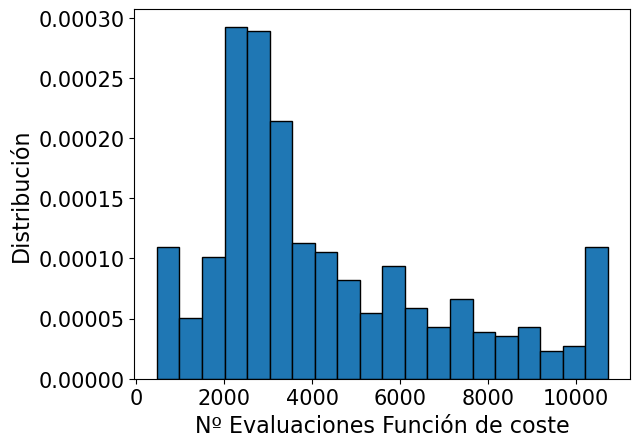

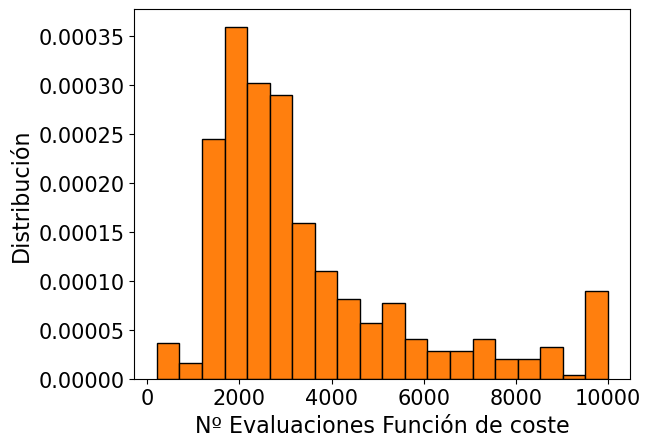

In [63]:
# Cargo los datos
AG_COBYLA_loaded_data = np.loadtxt("data/genetic/data_GA+COBYLA_H2_twolocal_25.csv", delimiter=",")
COBYLA_loaded_data = np.loadtxt("data/genetic/data_COBYLA_H2_twolocal.csv", delimiter=",")

# Evaluations histogram
n_bars = 20
AG_COBYLA_hist = np.histogram(AG_COBYLA_loaded_data[:, 1], n_bars, density=True)
COBYLA_hist = np.histogram(COBYLA_loaded_data[:, 1], n_bars, density=True)

AG_COBYLA_max_value = np.max(AG_COBYLA_loaded_data[:, 1])
AG_COBYLA_min_value = np.min(AG_COBYLA_loaded_data[:, 1])
COBYLA_max_value = np.max(COBYLA_loaded_data[:, 1])
COBYLA_min_value = np.min(COBYLA_loaded_data[:, 1])

plt.bar(AG_COBYLA_hist[1][:-1] + (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars/2, AG_COBYLA_hist[0], (AG_COBYLA_max_value - AG_COBYLA_min_value)/n_bars, edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

plt.bar(COBYLA_hist[1][:-1] + (COBYLA_max_value - COBYLA_min_value)/n_bars/2, COBYLA_hist[0], (COBYLA_max_value - COBYLA_min_value)/n_bars, color = "C1", edgecolor="black")
plt.ylabel("Distribución", size=16)
plt.xlabel("Nº Evaluaciones Función de coste", size=16)
plt.xticks(fontsize="15")
plt.yticks(fontsize="15")
plt.show()

In [ ]:
from scipy.optimize import differential_evolution


# ====================================================================
#            VQE implementation for BP study
# ====================================================================
def VQE_minimization_DE(ansatz_function, minQubits: int, maxQubits: int, base_observable, initial_guess: str = "zero", print_info: bool = True, plot_info: bool = True):
    """
    Compute the VQE algorithm using different numbers of qubits, then plot the minimization progess and the derivatives information.
    -----------------------------------------
    Args:
        ansatz_function (method): A function defined as follows: ansatz_function(N_qubits (int)) -> qc (QuantumCircuit), num_params (int)
        minQubits (int): The smallest number of qubits used.
        maxQubits (int): The greatest number of qubits used.
        base_observable (SparsePauliOp): The observable to be measured in its minimal form, it should use minQubits number of qubits.
        index (list[int] or str): With respect to which parameters the derivative will be taken. If given "all", it calculates all the derivatives.
        initial_guess (str or NumPy 1D array): "zero" initial guess with all parameters equal to cero, "rand" -> random initial guess. 1D Array -> the initial guess. default="zero".
        minimizer (str): scipy.optimize.minimize possible optimization methods, default="COBYLA".
    -----------------------------------------
    Returns:
        (Dictionary): 
            "minimum_values" : (list[float]): A list containing the minimum found for every number of qubits.
            "n_qubits" : (list[int]): A list containing the number of qubits used.
    """

    data = {
        "n_qubits": [],
        "minimum_values": []
    }

    for i in range(minQubits, maxQubits+1):

        estimator = Estimator()
        
        current_observable = cf.expand_observable(base_observable, i)
        ansatz_circuit, num_params = ansatz_function(i)

        # Initial parameters
        if initial_guess == "rand":
            initial_param_vector = np.random.random(num_params)
        elif initial_guess == "zero":
            initial_param_vector = np.zeros(num_params)
        elif initial_guess is np.ndarray():
            initial_param_vector = initial_guess
        else:
            print("Invalid initial guess, using all parameters as zero")

        # Current iteration information
        if print_info:
            print("\n=====================================================")
            print(f"Preparando ejecución para {i} qubits.")
            print(f"Se usarán {num_params} parámetros")

        # Dictionary to save the evolution of the cost function
        cost_history_dict = {
            "iters": 0,
            "cost_history": []
        }
        
        def cost_func(params, ansatz, observable, estimator):

            cost = cf.evaluate_observable(params, ansatz, observable, estimator)
            cost_history_dict["iters"] += 1
            cost_history_dict["cost_history"].append(cost)

            return cost

        # Optimization
        res = differential_evolution(
            cost_func,
            bounds=[(0, 2*np.pi) for n in range(num_params)],
            args=(ansatz_circuit, current_observable, estimator)
        )

        # Save the results in the dictionary
        data["n_qubits"].append(i)
        data["minimum_values"].append(res.fun)

        # Show the evolution of the cost function
        if plot_info:
            fig, ax = plt.subplots()
            ax.plot(range(cost_history_dict["iters"]), cost_history_dict["cost_history"], label=r"$\langle O\rangle$")

            ax.set_xlabel("Iteraciones")
            ax.set_ylabel(r"$\langle O\rangle$")
            ax.set_title(f"Minimización para {i} qubits")
            plt.legend()
            plt.show()

        if plot_info:
            print(f"Fin ejecución con {i} qubits. Mínimo encontrado: {res.fun}")
            print("=====================================================")

    return data


Preparando ejecución para 4 qubits.
Se usarán 18 parámetros


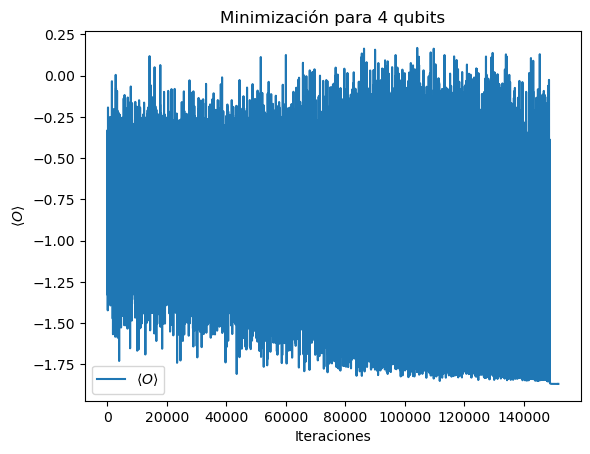

Fin ejecución con 4 qubits. Mínimo encontrado: -1.8680386376751572

Preparando ejecución para 5 qubits.
Se usarán 21 parámetros


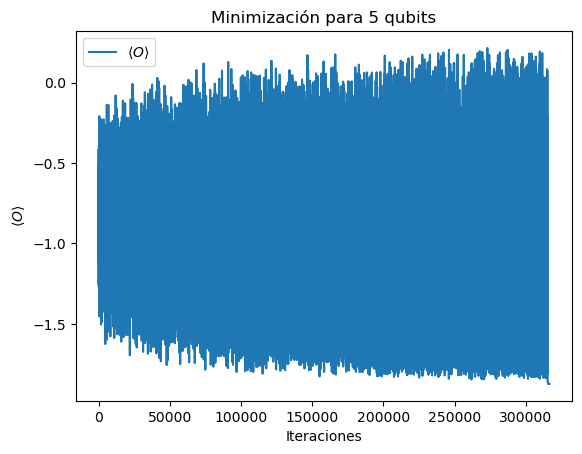

Fin ejecución con 5 qubits. Mínimo encontrado: -1.8733235813363935

Preparando ejecución para 6 qubits.
Se usarán 27 parámetros


KeyboardInterrupt: 

In [18]:
# Hamiltonians
with open(f"H2/data/hamiltonian0.719.pkl", "rb") as f:
    hamiltonian = pickle.load(f)


data = VQE_minimization_DE(anz.build_Nlocal_ansatz, 4, 12, hamiltonian)